In [11]:
import pandas as pd
import numpy as np

In [8]:
data=pd.read_excel(r'C:\Users\13670\Desktop\test.xls')

In [9]:
data

,desc,summ,count_per
0,异常回声,missing,82.282559
1,异常回声,囊肿,7.179015
2,异常回声,错构瘤,5.545329
3,异常回声,结节,4.095720
4,异常回声,占位,0.897377
5,无回声,囊肿,97.409853
6,无回声,missing,1.481715
7,无回声,钙乳症,0.647472
8,无回声,错构瘤,0.224471
9,无回声,结节,0.147975


In [12]:
np.unique(data.desc)

array(['低回声', '囊性回声', '异常回声', '强回声', '无回声', '混合回声', '等回声', '高回声'],
      dtype=object)

In [33]:
import seaborn as sns 
import itertools 

results = pd.DataFrame(index=[i for i in np.unique(data.desc)],\
        columns=[i for i in np.unique(data.summ)])

results

,missing,占位,囊肿,结晶,结石,结节,钙乳症,钙化灶,错构瘤
低回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
囊性回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
异常回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
强回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
无回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
混合回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
等回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
高回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
 data1 = data.loc[data.desc== '低回声',:]

In [34]:
import matplotlib.pyplot as plt 

for desc,summ in itertools.product(np.unique(data.desc),\
                               np.unique(data.summ)):
    data1 = data.loc[data.desc== desc,:]
    perc = data1.loc[data.summ== summ,"count_per"].values
    if len(perc):
        results.loc[desc, summ] = round(perc[0],2)
    else:
        continue
        
results

,missing,占位,囊肿,结晶,结石,结节,钙乳症,钙化灶,错构瘤
低回声,71.1,8.44,5.7,0.21,0.63,11.94,NaN,0.21,1.78
囊性回声,15.63,0.05,83.92,0.14,NaN,0.02,0.07,NaN,0.17
异常回声,82.28,0.9,7.18,NaN,NaN,4.1,NaN,NaN,5.55
强回声,0.84,0.05,0.03,52.51,38.37,0.09,1.26,5.37,1.47
无回声,1.48,0.04,97.41,0.01,0.03,0.15,0.65,0,0.22
混合回声,66.36,25.12,2.76,NaN,NaN,0.69,NaN,NaN,5.07
等回声,61.67,19.17,1.67,NaN,NaN,4.17,NaN,NaN,13.33
高回声,3.13,0.33,0.05,52.86,2.69,0.96,0.26,8.2,31.52


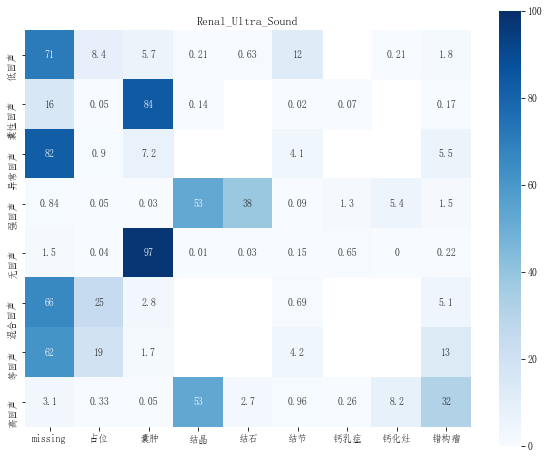

In [41]:
results1 = results[results.columns].astype(float)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results1,
             annot=True,
                 vmax=100, 
                 square=True, 
                 cmap="Blues"
                )

ax.set_title('Renal_Ultra_Sound')
plt.rcParams['font.sans-serif']=['FangSong']
plt.rcParams['axes.unicode_minus']=False

plt.show() 

In [71]:
data2 = pd.read_excel(r'C:\Users\13670\Desktop\test1.xls')

results_1 = pd.DataFrame(index=[i for i in np.unique(data2.desc)],\
        columns=[i for i in np.unique(data2.summ)])

results_1

,missing,低回声,占位,囊性回声,囊肿,异常回声,强回声,无回声,混合回声,等回声,结晶,结石,结节,钙乳症,钙化灶,错构瘤,高回声
missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
低回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
占位,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
囊性回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
囊肿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
异常回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
强回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
无回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
混合回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
等回声,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
for desc,summ in itertools.product(np.unique(data2.desc),\
                               np.unique(data2.summ)):
    data3 = data2.loc[data2.desc== desc,:]
    if desc == summ:
        perc = [100]
        results_.loc[desc, summ] = 100
    else:
        perc = data3.loc[data3.summ== summ,"count_per"].values
        if len(perc):
            results_.loc[desc, summ] = round(perc[0],2)
        else:
            continue
        
results_

,missing,低回声,占位,囊性回声,囊肿,异常回声,强回声,无回声,混合回声,等回声,结晶,结石,结节,钙乳症,钙化灶,错构瘤,高回声
missing,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
低回声,71.1,100,8.44,NaN,5.7,NaN,NaN,NaN,NaN,NaN,0.21,0.63,11.94,NaN,0.21,1.78,NaN
占位,31.26,18.74,100,0.17,NaN,0.79,20.11,9.44,4.21,5.25,NaN,NaN,NaN,NaN,NaN,NaN,10.02
囊性回声,15.63,NaN,0.05,100,83.92,NaN,NaN,NaN,NaN,NaN,0.14,NaN,0.02,0.07,NaN,0.17,NaN
囊肿,3.3,0.12,NaN,2.12,100,0.07,7.56,86.48,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.34
异常回声,82.28,NaN,0.9,NaN,7.18,100,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN,NaN,5.55,NaN
强回声,0.84,NaN,0.05,NaN,0.03,NaN,100,NaN,NaN,NaN,52.51,38.37,0.09,1.26,5.37,1.47,NaN
无回声,1.48,NaN,0.04,NaN,97.41,NaN,NaN,100,NaN,NaN,0.01,0.03,0.15,0.65,0,0.22,NaN
混合回声,66.36,NaN,25.12,NaN,2.76,NaN,NaN,NaN,100,NaN,NaN,NaN,0.69,NaN,NaN,5.07,NaN
等回声,61.67,NaN,19.17,NaN,1.67,NaN,NaN,NaN,NaN,100,NaN,NaN,4.17,NaN,NaN,13.33,NaN


In [58]:
results_.to_excel(r"C:\Users\13670\Desktop\待完成\项目4 回声tag分析\肾脏\20201218\矩阵1.xlsx")

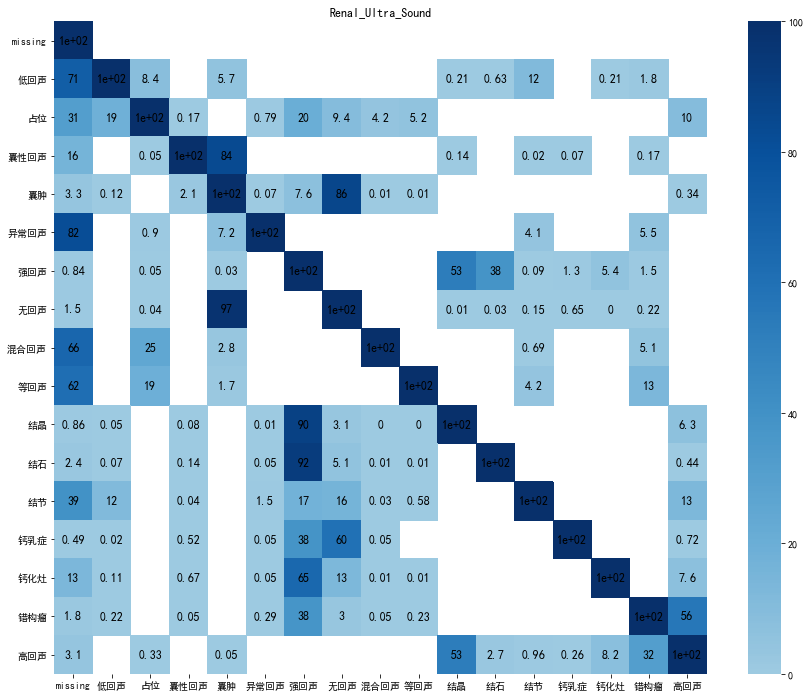

In [78]:
results1_ = results_[results_.columns].astype(float)

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(results1_,
                 annot=True,
             annot_kws={'size':12,'weight':'bold', 'color':'black'},
                 vmax=100, 
                 square=True, 
                 cmap="Blues",
                 center= 20
                )

ax.set_title('Renal_Ultra_Sound')
# plt.rcParams['font.sans-serif']=['FangSong']
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus']=False

plt.show() 